# Task: Prediction using Decision Tree Algorithm

### Author: Hassan Ikram

 ## Objective: 
 Classify the Iris leaf species using decision tree classifier and visualize it graphically.
 The data is download from  https://bit.ly/3kXTdox

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
import seaborn as sns

In [2]:
data = pd.read_csv("Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
## CHecking the non-null column in the data and the data type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
## Checking the unique values of species in the dataset 
data["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

## Data Visualization

Text(0.5, 1.0, 'Scatter plot on Iris dataset')

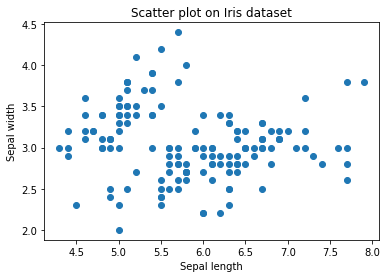

In [6]:
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Scatter plot on Iris dataset')

Text(0.5, 1.0, 'Scatter plot on Iris dataset')

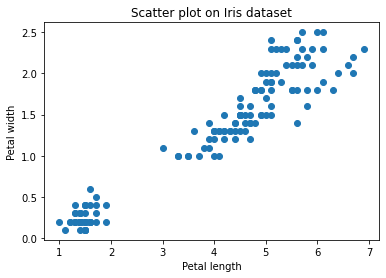

In [7]:
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Scatter plot on Iris dataset')

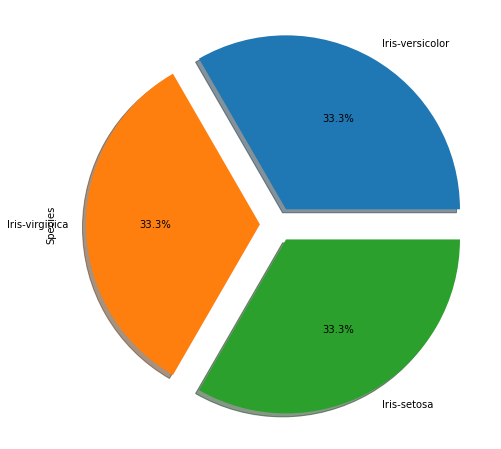

In [8]:
data["Species"].value_counts().plot.pie(explode=(0.1,0.1,0.1), autopct="%1.1f%%", shadow=True,figsize=(8,8))
plt.show()

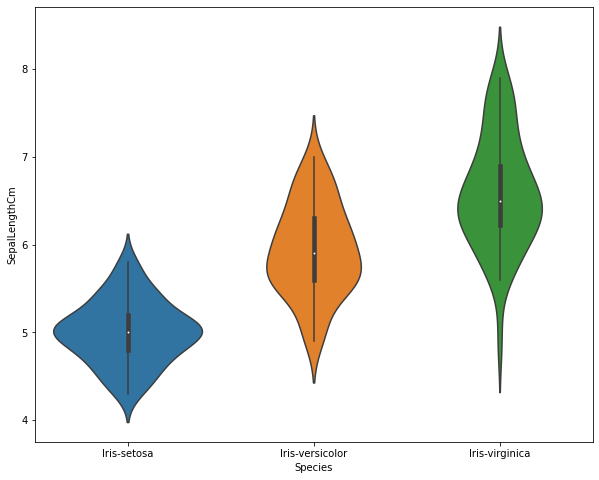

In [9]:
fig = plt.gcf()
fig.set_size_inches(10,8)
fig = sns.violinplot(x="Species", y="SepalLengthCm", data=data)

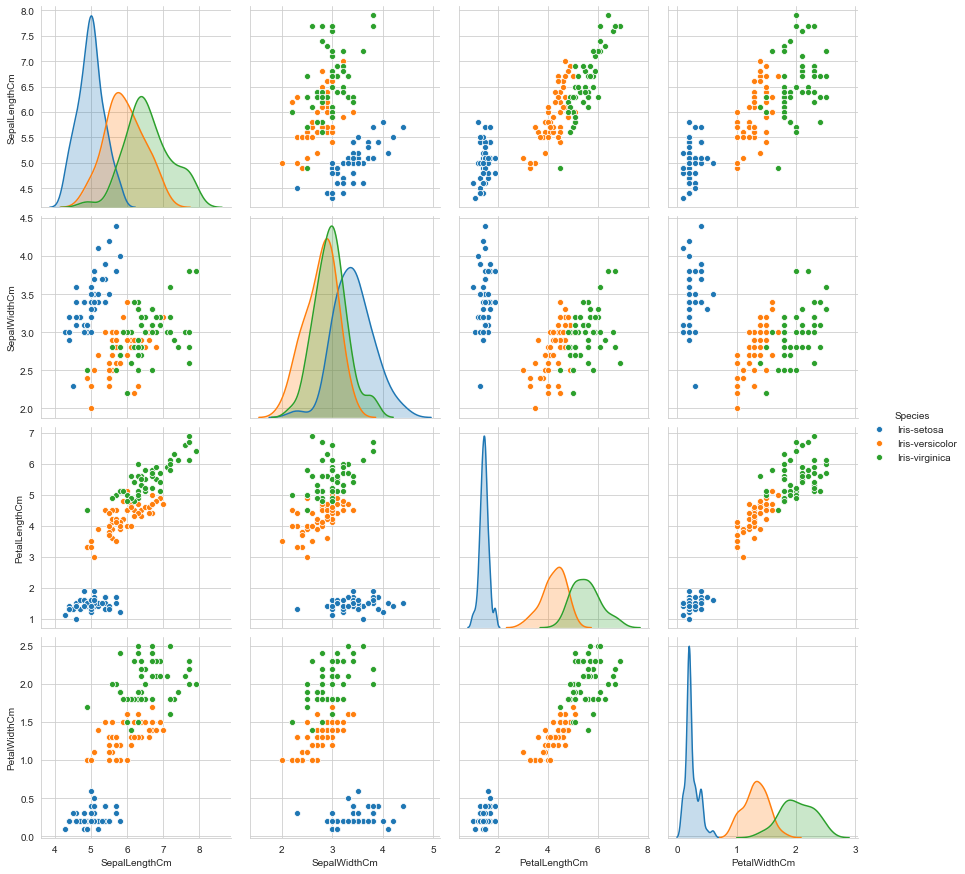

In [10]:
## Creating paiplots to visualize the features relationship with dependent variable
sns.set_style("whitegrid");
sns.pairplot(data.drop("Id", axis=1), hue="Species", height=3);
plt.show()

## Converting data["Species"] values into numerical values

In [11]:
data['Species'] = data['Species'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0, 1, 2])

## Splitting the data into train and test sets

In [12]:
## Converting our data into numpy arrays
X = np.array(data.drop(["Species", "Id"], axis=1))
y = np.array(data['Species'])


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


In [14]:
X_train.shape,y_train.shape 

((120, 4), (120,))

## Training on Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

In [16]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
## Predicting on the test set

In [18]:
predictions = classifier.predict(X_test)

In [19]:
## Checking the Score of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9333333333333333

In [20]:
## Creating a confusion matrix
from sklearn.metrics import confusion_matrix
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]


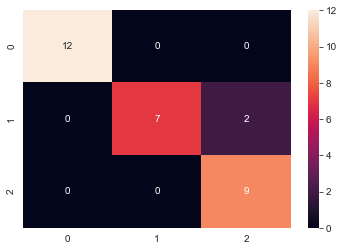

In [21]:
sns.heatmap(cf_matrix, annot=True)

In [22]:
# Creating a dataframe to check how many values are predicted correctly
pred = pd.DataFrame({"Real Species": y_test, "Predicted Species": predictions})
pred

,Real Species,Predicted Species
0,0,0
1,2,2
2,0,0
3,1,1
4,2,2
5,2,2
6,2,2
7,0,0
8,2,2
9,0,0


## Visualizing the Decision Tree Classifier

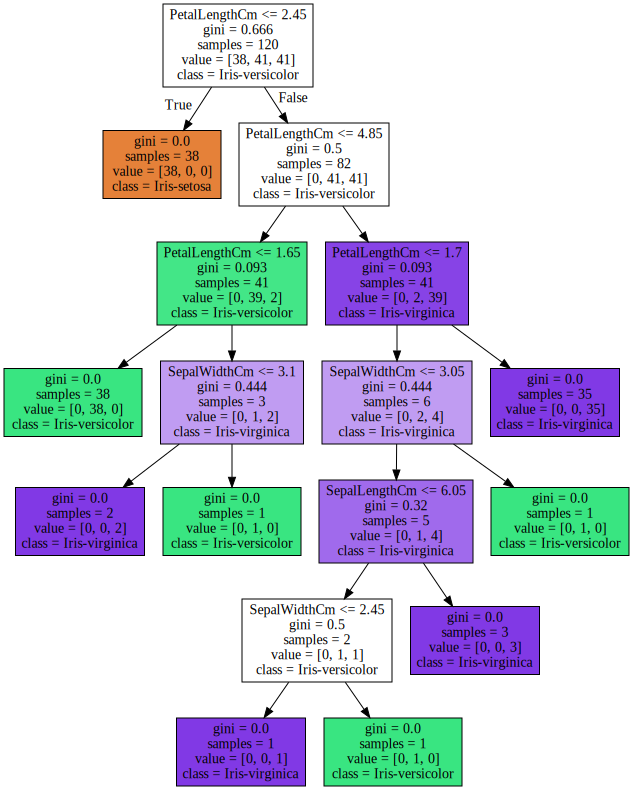

In [23]:
import graphviz
# DOT data
dot_data = sklearn.tree.export_graphviz(classifier, out_file=None, 
                                feature_names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalLengthCm"],  
                                class_names=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


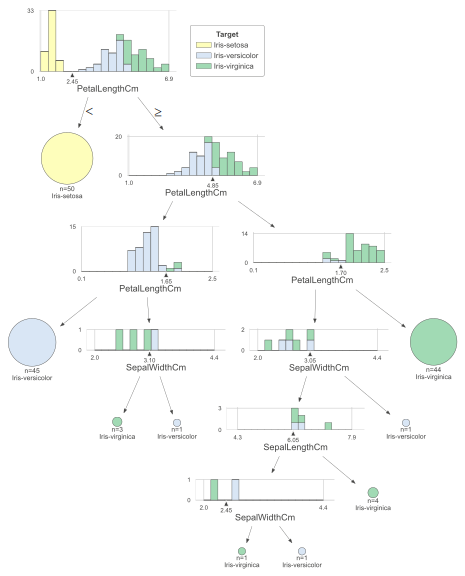

In [24]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(classifier, X, y,
               target_name="Target",
               feature_names = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalLengthCm"],
               class_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
              )

viz

## END